In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [38]:
import zipfile
def read_zip(fname):
    """
    Function to read zip data file
    """
    with zipfile.ZipFile(fname, 'r') as z:
        with z.open(z.namelist()[0]) as f:
            return pd.read_csv(f)

In [39]:
# read the dataset into environment
dataset_Sales = read_zip("archive/cleaned_Sales.csv.zip")
df_Sales = dataset_Sales.copy()
df_Sales.head(5)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750.0,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,750.0,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [40]:
import re
def extract_city(inventory_id):
    """
    Extract the city from inventory_id
    """
    match = re.search(r'_(.*?)_', inventory_id)
    return match.group(1) if match else None

In [41]:
# get the city of sales
df_Sales['City'] = df_Sales['InventoryId'].apply(extract_city)
# get if the sales happens in weekend
df_Sales['SalesDate'] = pd.to_datetime(df_Sales['SalesDate'], format='%m/%d/%Y')
df_Sales['Weekday'] = df_Sales['SalesDate'].dt.weekday
# drop unessary columns
df_Sales = df_Sales.drop(columns=['SalesDollars', 'VendorName', 'SalesDate', "ExciseTax", "Description", "InventoryId", "Size"], errors='ignore')
# sum up the sales whose features are the same
df_Sales = df_Sales.groupby(df_Sales.columns.drop('SalesQuantity').tolist(), as_index=False)['SalesQuantity'].sum()

In [42]:
# convert city into numerical feature for training
df_Sales['City'] = df_Sales['City'].astype('category')
city_mapping = dict(enumerate(df_Sales['City'].cat.categories))
df_Sales['City'] = df_Sales['City'].cat.codes

print("City ID Mapping:", city_mapping)

City ID Mapping: {0: 'ABERDEEN', 1: 'AETHELNEY', 2: 'ALNERWICK', 3: 'ARBINGTON', 4: 'ASHBORNE', 5: 'AYLESBURY', 6: 'BALERNO', 7: 'BALLYMENA', 8: 'BARNCOMBE', 9: "BEGGAR'S HOLE", 10: 'BLACK HOLLOW', 11: 'BLACKPOOL', 12: 'BREDWARDINE', 13: 'BROMWICH', 14: 'BULLMAR', 15: 'CAERSHIRE', 16: 'CARDEND', 17: 'CESTERFIELD', 18: 'CLAETHORPES', 19: 'CLARCTON', 20: 'CULCHETH', 21: 'DONCASTER', 22: 'DRY GULCH', 23: 'EANVERNESS', 24: 'EASTHALLOW', 25: 'EASTHAVEN', 26: 'FURNESS', 27: 'GARIGILL', 28: 'GOULCREST', 29: 'GRAYCOTT', 30: 'GUTHRAM', 31: 'HALIVAARA', 32: 'HARDERSFIELD', 33: 'HARTLEPOOL', 34: 'HILLFAR', 35: 'HORNSEY', 36: 'IRRAGIN', 37: 'KELD', 38: 'KILMARNOCK', 39: "KNIFE'S EDGE", 40: 'LANTEGLOS', 41: 'LARNWICK', 42: 'LEESIDE', 43: 'LEWES', 44: 'LUNDY', 45: 'LUTON', 46: 'MOUNTMEND', 47: 'NORFOLK', 48: 'OLDHAM', 49: 'PAENTMARWY', 50: 'PAETHSMOUTH', 51: 'PALPERROTH', 52: "PELLA'S WISH", 53: 'PITMERDEN', 54: 'PORTHCRAWL', 55: 'SHARNWICK', 56: 'SOLARIS', 57: 'STANMORE', 58: 'SUTTON', 59: 'SWORDBR

In [43]:
df_Sales.head(5)

,Store,Brand,SalesPrice,Volume,Classification,VendorNo,City,Weekday,SalesQuantity
0,1,58,12.99,750,1,8320,32,1,2
1,1,58,12.99,750,1,8320,32,2,2
2,1,58,12.99,750,1,8320,32,3,3
3,1,58,12.99,750,1,8320,32,5,3
4,1,58,12.99,750,1,8320,32,6,1


In [44]:
# train and test set preparation
X = df_Sales.drop(columns=['SalesQuantity'])
y = df_Sales['SalesQuantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# training for Linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr =mean_squared_error(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}")

Linear Regression - MAE: 3.41, MSE: 54.56


In [46]:
# training for Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression - MAE: {mae_ridge:.2f}, MSE: {mse_ridge:.2f}")

Ridge Regression - MAE: 3.41, MSE: 54.56


In [47]:
# training for Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}")

Random Forest - MAE: 2.56, MSE: 29.25


In [48]:
# training for KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f"KNN Regression - MAE: {mae_knn:.2f}, MSE: {mse_knn:.2f}")

KNN Regression - MAE: 2.70, MSE: 33.86


In [49]:
# Sample process of prediction
sample_input = pd.DataFrame({
    'Store': [11], 
    'Brand': [58], 
    'SalesPrice': [12.99], 
    'Volume': [750], 
    'Classification': [1], 
    'VendorNo': [8320], 
    'City': [88],
    'Weekday': [1]
})

predicted_sample_lr = lr_model.predict(sample_input)
predicted_sample_ridge = ridge_model.predict(sample_input)
predicted_sample_rf = rf_model.predict(sample_input)
predicted_sample_knn = knn_model.predict(sample_input)

print(f"Predicted SalesQuantity - Linear Regression: {predicted_sample_lr[0]:.2f}")
print(f"Predicted SalesQuantity - Ridge Regression: {predicted_sample_ridge[0]:.2f}")
print(f"Predicted SalesQuantity - Random Forest: {predicted_sample_rf[0]:.2f}")
print(f"Predicted SalesQuantity - KNN: {predicted_sample_knn[0]:.2f}")

Predicted SalesQuantity - Linear Regression: 4.71
Predicted SalesQuantity - Ridge Regression: 4.71
Predicted SalesQuantity - Random Forest: 1.82
Predicted SalesQuantity - KNN: 2.60


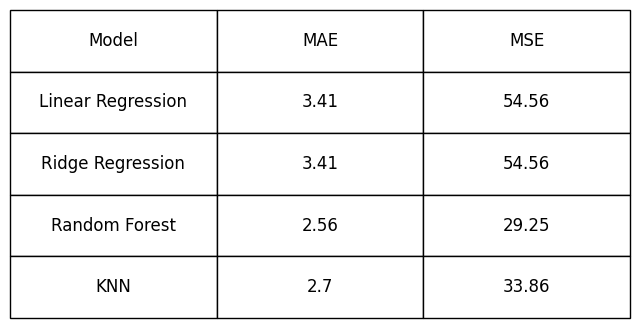

In [50]:
# Define model performance dictionary with formatted values (2 decimal places)
model_performance = {
    "Model": ["Linear Regression", "Ridge Regression", "Random Forest", "KNN"],
    "MAE": [round(mae_lr, 2), round(mae_ridge, 2), round(mae_rf, 2), round(mae_knn, 2)],
    "MSE": [round(mse_lr, 2), round(mse_ridge, 2), round(mse_rf, 2), round(mse_knn, 2)]
}

# Convert to DataFrame
df_performance = pd.DataFrame(model_performance)

# Create an enlarged table for better visibility
fig, ax = plt.subplots(figsize=(8, 4))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table in the plot
table = ax.table(cellText=df_performance.values, colLabels=df_performance.columns, cellLoc='center', loc='center')

# Style the table for better readability
table.auto_set_font_size(False)
table.set_fontsize(12)
# Adjust column width and height
table.auto_set_column_width([3, 4, 4])
for key, cell in table.get_celld().items():
    cell.set_height(0.2)
plt.show()

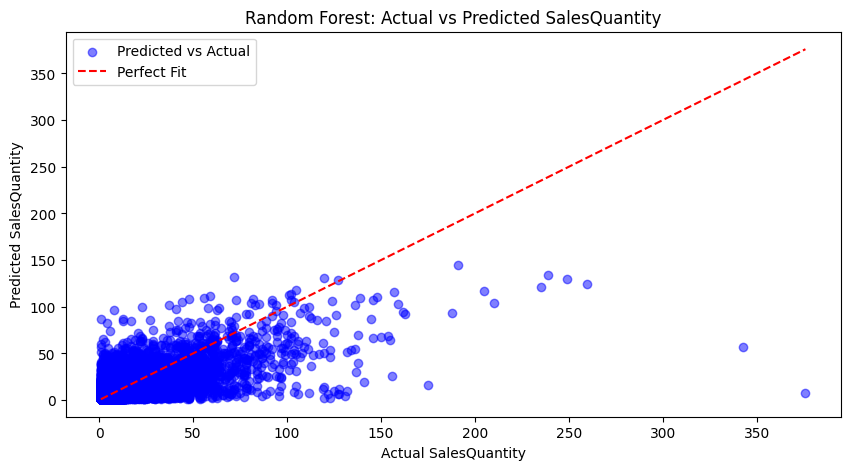

In [51]:
# Plot the relationship with acutal value and predicted value
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual SalesQuantity")
plt.ylabel("Predicted SalesQuantity")
plt.title("Random Forest: Actual vs Predicted SalesQuantity")
plt.legend()
plt.show()